In [194]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Exploratory Data Analysis

In [195]:
raw_data = pd.read_csv('../datasets/1.04. Real-life example.csv')

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [196]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [197]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [198]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Since missing values account for <5% of observations, we can choose to drop them.

In [199]:
data_cleaned = data.dropna(axis=0)

In [200]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [201]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year'], dtype=object)

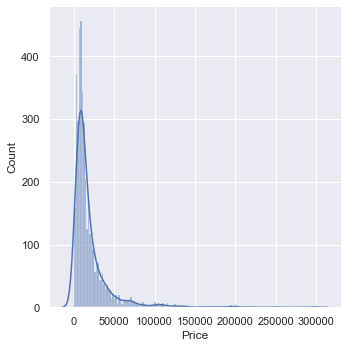

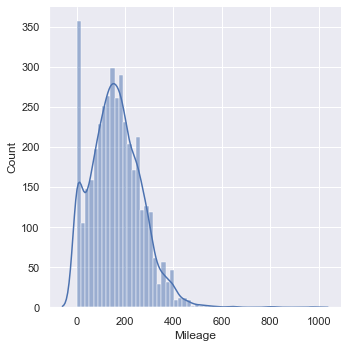

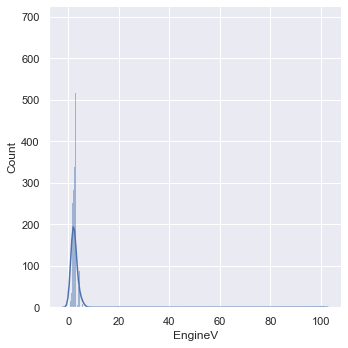

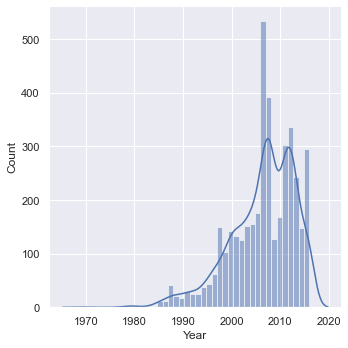

In [202]:
feature_names = ['Price', 'Mileage', 'EngineV', 'Year']

for feature in feature_names:
    sns.displot(data_cleaned, x=feature, kde=True, kde_kws=dict(cut=3))
    plt.show()

We note that 'Price' is exponentially distributed.

### Mileage

In [203]:
data_2 = data_cleaned[data_cleaned['Mileage'] < data_cleaned['Mileage'].quantile(0.99)]

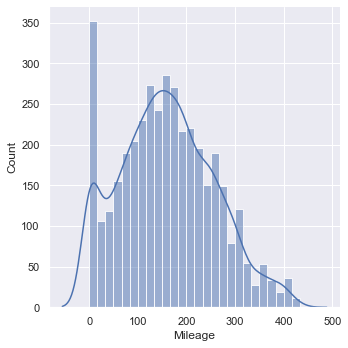

In [204]:
sns.displot(data_2, x='Mileage', kde=True, kde_kws=dict(cut=3))
plt.show()

### EngineV

In [205]:
data_3 = data_2[data_2['EngineV']<6.5]

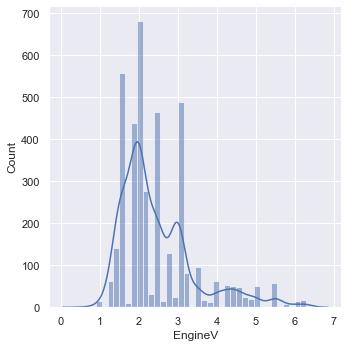

In [206]:
sns.displot(data_3, x='EngineV', kde=True, kde_kws=dict(cut=3))
plt.show()

We can consider treating 'EngineV' as a categorical variable.

### Year

In [207]:
data_4 = data_3[data_3['Year']>data_3['Year'].quantile(0.01)]

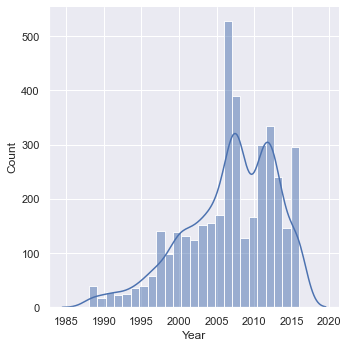

In [208]:
sns.displot(data_4, x='Year', kde=True, kde_kws=dict(cut=3))
plt.show()

### Reset Index

In [209]:
data_cleaned_2 = data_4.reset_index(drop=True)

In [210]:
data_cleaned_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking OLS Assumptions

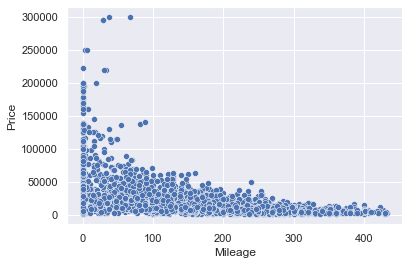

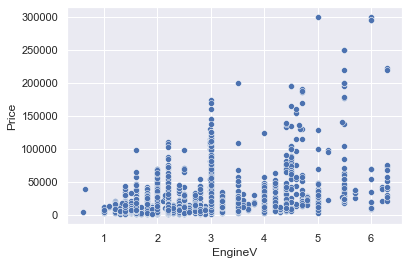

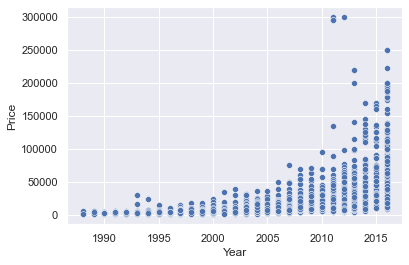

In [211]:
feature_names = ['Mileage', 'EngineV', 'Year']
for feature in feature_names:
    sns.scatterplot(data_cleaned_2, y='Price', x=feature)
    plt.show()

### Relaxing OLS Assumptions

In [212]:
log_price = np.log(data_cleaned_2['Price'])
data_cleaned_2['log_price'] = log_price
data_cleaned_2

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


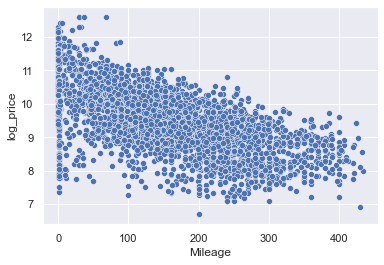

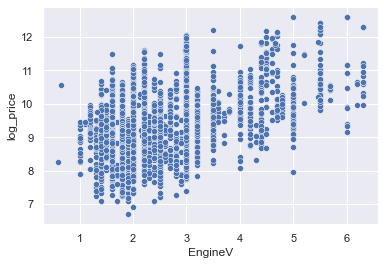

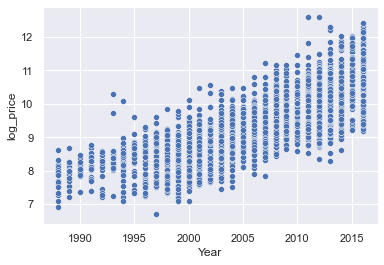

In [213]:
for feature in feature_names:
    sns.scatterplot(data_cleaned_2, y='log_price', x=feature)
    plt.show()

Linear relationships can be clearly observed.

#### Addressing Multicollinearity

In [214]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [215]:
variables = data_cleaned_2[feature_names]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

vif

,VIF,Features
0,3.703266,Mileage
1,7.400348,EngineV
2,10.323287,Year


Since 'Year' has the highest VIF, we shall remove it.

In [216]:
data_cleaned_3 = data_cleaned_2.drop(['Year'],axis=1)

In [217]:
variables_2 = data_cleaned_3[['Mileage','EngineV']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables_2.values, i) for i in range(variables_2.shape[1])]
vif["Features"] = variables_2.columns

vif

,VIF,Features
0,2.652846,Mileage
1,2.652846,EngineV


In [218]:
data_cleaned_3.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'log_price'], dtype=object)

In [219]:
data_cleaned_4 = pd.get_dummies(data_cleaned_3, drop_first=True)

In [220]:
data_cleaned_4

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3903,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3904,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3905,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [221]:
data_cleaned_4.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [222]:
variable_names = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [223]:
data_preprocessed = data_cleaned_4[variable_names]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [226]:
variables_3 = data_preprocessed[variable_names[1:]]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables_3.values, i) for i in range(variables_3.shape[1])]
vif["Features"] = variables_3.columns

vif

,VIF,Features
0,4.320071,Mileage
1,7.719151,EngineV
2,2.295589,Brand_BMW
3,2.966114,Brand_Mercedes-Benz
4,1.640615,Brand_Mitsubishi
5,2.083077,Brand_Renault
6,2.162945,Brand_Toyota
7,2.841278,Brand_Volkswagen
8,1.460432,Body_hatch
9,1.535418,Body_other


Can consider removing 'Registration_yes' feature.

# Regression

In [229]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Data Scaling

In [230]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [231]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [232]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2)

### Creating the Regression

In [234]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [235]:
y_hat = reg.predict(x_train)

#### Predictions vs Targets

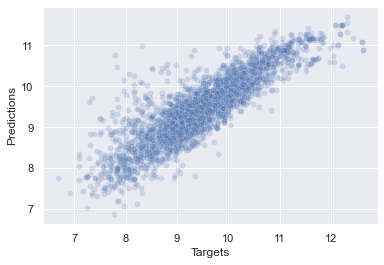

In [255]:
sns.scatterplot(y=y_hat,x=y_train, alpha=0.5)
plt.ylabel('Predictions')
plt.xlabel('Targets')
plt.show()

#### Residual Plot

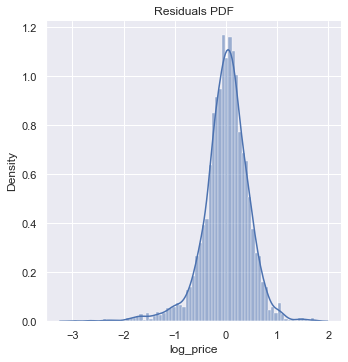

In [238]:
sns.displot(y_train - y_hat, kde=True, stat="density", kde_kws=dict(cut=3))
plt.title("Residuals PDF")
plt.show()

#### R-Squared and Adjusted R-Squared

In [240]:
print('R-squared: {}'.format(reg.score(x_train,y_train)))
print('Adj. R-squared: {}'.format(1 - (1-reg.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)))

R-squared: 0.7566362365168471
Adj. R-squared: 0.7553046678077342


In [246]:
x_train_sm = sm.add_constant(x_train)
model_sm = sm.OLS(y_train,x_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:47:20   Log-Likelihood:                -1946.9
No. Observations:                3125   AIC:                             3930.
Df Residuals:                    3107   BIC:                             4039.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4434      0.008   1166.267      0.0

In [253]:
print('Intercept: {}'.format(reg.intercept_))

Intercept: 9.443396362089276


In [248]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.479075
1,EngineV,0.244714
2,Brand_BMW,0.019191
3,Brand_Mercedes-Benz,0.031548
4,Brand_Mitsubishi,-0.132605
5,Brand_Renault,-0.178350
6,Brand_Toyota,-0.061893
7,Brand_Volkswagen,-0.088201
8,Body_hatch,-0.139434
9,Body_other,-0.087337


# Testing

In [254]:
y_hat_test = reg.predict(x_test)

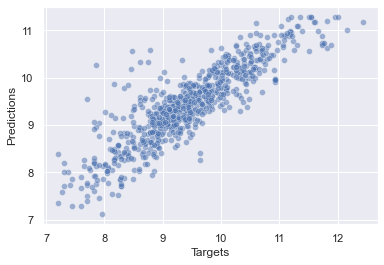

In [263]:
test_plot = sns.scatterplot(y=y_hat_test,x=y_test,alpha=0.5)
test_plot.set(xlabel='Targets', ylabel='Predictions')
plt.show()

In [269]:
df = pd.DataFrame()
df['Prediction'] = np.exp(y_hat_test)
y_test = y_test.reset_index(drop=True)
df['Target'] = np.exp(y_test)
df['Residual'] = df['Target'] - df['Prediction']
df['Difference%'] = np.absolute(df['Residual']/df['Target']*100)

In [271]:
df.describe(include='all')

,Prediction,Target,Residual,Difference%
count,782.000000,782.000000,782.000000,782.000000
mean,17018.893870,19605.486381,2586.592511,37.108372
std,14476.230831,24239.754732,14729.777712,67.057403
min,1227.226194,1350.000000,-34069.699064,0.006568
25%,7839.962247,7000.000000,-2281.503081,10.279140
50%,12257.825714,11775.000000,57.534065,23.889250
75%,21661.690449,22300.000000,3295.373553,40.067140
max,79507.980555,250000.000000,178405.635936,1003.545369


In [274]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
765,11500.76,11500.00,-0.76,0.01
469,32502.56,32500.00,-2.56,0.01
258,12874.02,12900.00,25.98,0.20
438,12873.74,12900.00,26.26,0.20
728,3093.53,3100.00,6.47,0.21
309,9022.02,9000.00,-22.02,0.24
187,17691.99,17639.47,-52.52,0.30
664,12458.49,12500.00,41.51,0.33
539,28800.67,28900.00,99.33,0.34
141,9535.53,9500.00,-35.53,0.37
